In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\user\Dropbox\PC\Desktop\Machine Learning\next labs\chrome_reviews.csv")

In [3]:
df.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


In [4]:
df.shape

(7204, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7204 entries, 0 to 7203
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               7204 non-null   int64 
 1   Review URL       7204 non-null   object
 2   Text             7203 non-null   object
 3   Star             7204 non-null   int64 
 4   Thumbs Up        7204 non-null   int64 
 5   User Name        7204 non-null   object
 6   Developer Reply  95 non-null     object
 7   Version          7119 non-null   object
 8   Review Date      7204 non-null   object
 9   App ID           7204 non-null   object
dtypes: int64(3), object(7)
memory usage: 562.9+ KB


In [6]:
df = df.dropna()
df.isnull().sum()

ID                 0
Review URL         0
Text               0
Star               0
Thumbs Up          0
User Name          0
Developer Reply    0
Version            0
Review Date        0
App ID             0
dtype: int64

In [7]:
df.describe()

,ID,Star,Thumbs Up
count,95.000000,95.000000,95.000000
mean,339585.547368,1.578947,2.221053
std,211948.052992,1.225430,15.329140
min,4087.000000,1.000000,0.000000
25%,125739.500000,1.000000,0.000000
50%,429731.000000,1.000000,0.000000
75%,462220.000000,1.000000,0.000000
max,642327.000000,5.000000,141.000000


In [8]:
df.columns

Index(['ID', 'Review URL', 'Text', 'Star', 'Thumbs Up', 'User Name',
       'Developer Reply', 'Version', 'Review Date', 'App ID'],
      dtype='object')

In [9]:
df = df.rename(columns={'Review URL': 'Review_URL', 'Thumbs Up': 'Thumbs_Up','User Name': 'User_Name','Developer Reply': 'Developer_Reply','Review Date': 'Review_Date','Thumbs Up': 'Thumbs_Up','App ID': 'App_ID'})

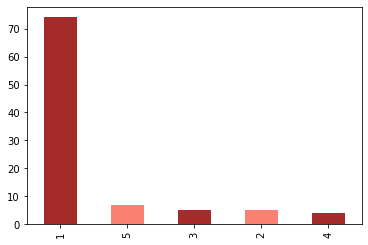

In [10]:
df.Star.value_counts().plot(kind="bar", color=["brown", "salmon"])
plt.show()

maximum rating are low

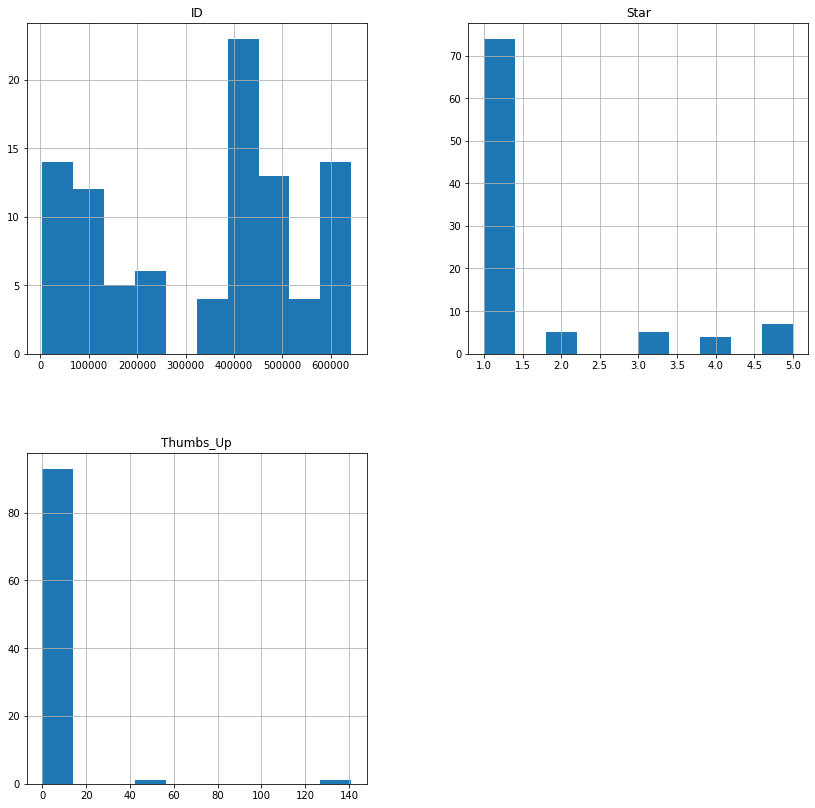

In [11]:
df.hist(figsize=(14,14))
plt.show()

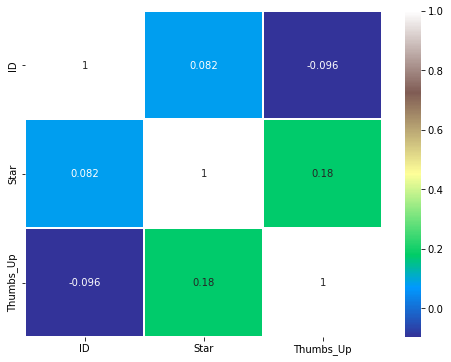

In [12]:
# create a correlation heatmap
sns.heatmap(df.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

In [13]:
df.head()

,ID,Review_URL,Text,Star,Thumbs_Up,User_Name,Developer_Reply,Version,Review_Date,App_ID
105,4087,https://play.google.com/store/apps/details?id=...,App not update plz halp,1,0,Subham Dey,"Hey Subham, thanks for reaching out. Would you...",86.0.4240.110,2020-12-21,com.android.chrome
411,8518,https://play.google.com/store/apps/details?id=...,Google Chrome didn't update,3,0,renu s,"Hey Renu, thanks for reaching out! We are awar...",81.0.4044.138,2020-12-24,com.android.chrome
437,8544,https://play.google.com/store/apps/details?id=...,Apps not updated,1,0,Deepak Sonker,"Hey Deepak, thanks for reaching out! We are aw...",83.0.4103.106,2020-12-24,com.android.chrome
442,8549,https://play.google.com/store/apps/details?id=...,I am not able to update,1,0,AKP Present,"Hey there, thanks for reaching out! We are awa...",83.0.4103.101,2020-12-24,com.android.chrome
464,8572,https://play.google.com/store/apps/details?id=...,Being not update,1,0,Puran Baraily,"Hey Puran, thanks for reaching out! We are awa...",85.0.4183.127,2020-12-24,com.android.chrome


In [14]:
x = df.loc[:,['ID','Thumbs_Up']]

In [15]:
x.head()

,ID,Thumbs_Up
105,4087,0
411,8518,0
437,8544,0
442,8549,0
464,8572,0


In [16]:
y=df.loc[:,['Star']]
y.head()

,Star
105,1
411,3
437,1
442,1
464,1


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
model.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.04749044156757032

In [22]:
import pickle

In [23]:
file = open('model.pkl', 'wb')

In [24]:
pickle.dump(model, file)